In [3]:
%load_ext autoreload
%autoreload 2

# load embeddings
from data.embeddings import load_saved_embeddings

train_embeddings = load_saved_embeddings(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    split="train",
    pooler="mean_with_attention",
    layer=24
)

eval_embeddings = load_saved_embeddings(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    split="eval",
    pooler="mean_with_attention",
    layer=24
)

test_embeddings = load_saved_embeddings(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    split="test",
    pooler="mean_with_attention",
    layer=24
)

# load classifier 
from data.models import load_saved_wrapperbox_model


knn_clf = load_saved_wrapperbox_model(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    pooler="mean_with_attention",
    wrapperbox="KNN"
)

svm_clf = load_saved_wrapperbox_model(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    pooler="mean_with_attention",
    wrapperbox="SVM",
)

lmeans_clf = load_saved_wrapperbox_model(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    pooler="mean_with_attention",
    wrapperbox="L_Means",
)

# load labels 
from data.datasets import load_dataset_from_hf, load_labels_at_split
import numpy as np
dataset = load_dataset_from_hf(dataset="toxigen")
train_labels = load_labels_at_split(dataset, "train")
eval_labels = load_labels_at_split(dataset, "eval")
train_eval_embeddings = np.vstack([train_embeddings, eval_embeddings])
train_eval_labels = np.concatenate([train_labels, eval_labels])
test_labels = load_labels_at_split(dataset, "test")

from datasets import DatasetDict, concatenate_datasets
train_eval_dataset = concatenate_datasets([dataset["train"], dataset["eval"]])
dataset_dict = DatasetDict(
    {"train": train_eval_dataset, "test": dataset["test"]}
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Token has not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /home/samsoup/.cache/huggingface/token
Login successful


In [2]:
from MinimalSubsetToFlipPredictions.wrappers.lmeans import FindMinimalSubsetLMeans
from classifiers.KMeansClassifier import KMeansClassifier

X_train, y_train = train_eval_embeddings[:100, :], train_eval_labels[:100]
X_test = test_embeddings[:100]
lmeans_test = KMeansClassifier(n_clusters=2, random_state=42)
lmeans_test.fit(X_train, y_train)

handler = FindMinimalSubsetLMeans()
minimal_subset_indices = handler.find_minimal_subset(
    clf=lmeans_test,
    train_embeddings=X_train,
    test_embeddings=X_test,
    train_labels=y_train,
)

minimal_subset_indices


Original predictions: [0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0]
Start example removal for cluster 0
For cluster 0, LMeans always predicted label 0


 11%|█         | 8/72 [00:00<00:00, 79.66it/s]

Removing training example 33
Train subset shapes: (99, 1024), (99,)
New cluster indices to label {0: 0, 1: 1}
New centroids: [[-0.12543985 -0.0507091  -0.07711402 ... -0.15665928  0.04542267
  -0.12952493]
 [ 0.21649622 -0.12407977  0.01793584 ...  0.07508251  0.25963662
   0.06782538]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], is all equal to 0: True 
Removing training example 49
Train subset shapes: (98, 1024), (98,)
New cluster indices to label {0: 1, 1: 0}
New centroids: [[ 0.21649622 -0.12407977  0.01793584 ...  0.07508251  0.25963662
   0.06782538]
 [-0.12517567 -0.05068258 -0.07608106 ... -0.15601474  0.04319322
  -0.12927538]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], is all equal to 0: True 
Removing training example 19
Train subset shapes: (97, 1024), (97,)
New cluster indices to label {0: 0, 1: 1}


 39%|███▉      | 28/72 [00:00<00:00, 92.67it/s]


New centroids: [[-0.11664866 -0.05009172 -0.08649078 ... -0.15121965  0.04136491
  -0.12310585]
 [ 0.21649622 -0.12407977  0.01793584 ...  0.07508251  0.25963662
   0.06782538]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], is all equal to 0: True 
Removing training example 77
Train subset shapes: (82, 1024), (82,)
New cluster indices to label {0: 0, 1: 1}
New centroids: [[-0.11700718 -0.0515695  -0.08455324 ... -0.15261606  0.04076022
  -0.1218581 ]
 [ 0.21649622 -0.12407977  0.01793584 ...  0.07508251  0.25963662
   0.06782538]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], is all equal to 0: True 
Removing training example 6
Train subset shapes: (81, 1024), (81,)
New cluster indices to label {0: 1, 1: 0}
New centroids: [[ 0.21649622 -0.12407977  0.01793584 ...  0.07508251  0.25963662
   0.06782538]
 [-0.11695076 

 53%|█████▎    | 38/72 [00:00<00:00, 95.44it/s]

New cluster indices to label {0: 0, 1: 1}
New centroids: [[-0.1075808  -0.04896335 -0.1106805  ... -0.12710969  0.01466087
  -0.09363781]
 [ 0.21649622 -0.12407977  0.01793584 ...  0.07508251  0.25963662
   0.06782538]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], is all equal to 0: True 
Removing training example 12
Train subset shapes: (61, 1024), (61,)
New cluster indices to label {0: 1, 1: 0}
New centroids: [[ 0.21649622 -0.12407977  0.01793584 ...  0.07508251  0.25963662
   0.06782538]
 [-0.10886489 -0.04879906 -0.11127475 ... -0.12127282  0.01131486
  -0.09589171]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], is all equal to 0: True 
Removing training example 69
Train subset shapes: (60, 1024), (60,)
New cluster indices to label {0: 1, 1: 0}
New centroids: [[ 0.21649622 -0.12407977  0.01793584 ...  0.07508251

 83%|████████▎ | 60/72 [00:00<00:00, 78.15it/s]

New cluster indices to label {0: 1, 1: 0}
New centroids: [[ 0.21649622 -0.12407977  0.01793584 ...  0.07508251  0.25963662
   0.06782538]
 [-0.10090938 -0.0618761  -0.09716807 ... -0.12034641 -0.00103505
  -0.10541403]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], is all equal to 0: True 
Removing training example 39
Train subset shapes: (54, 1024), (54,)
New cluster indices to label {0: 1, 1: 0}
New centroids: [[ 0.21649622 -0.12407977  0.01793584 ...  0.07508251  0.25963662
   0.06782538]
 [-0.09323544 -0.07054456 -0.08839067 ... -0.12254596 -0.00250115
  -0.09908561]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], is all equal to 0: True 
Removing training example 4
Train subset shapes: (53, 1024), (53,)
New cluster indices to label {0: 1, 1: 0}
New centroids: [[ 0.21649622 -0.12407977  0.01793584 ...  0.07508251 

 97%|█████████▋| 70/72 [00:00<00:00, 79.68it/s]


New cluster indices to label {0: 1, 1: 0}
New centroids: [[ 0.21649622 -0.12407977  0.01793584 ...  0.07508251  0.25963662
   0.06782538]
 [-0.05821137 -0.05317039 -0.01750735 ... -0.12231525 -0.05969456
  -0.00513671]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], is all equal to 0: True 
Removing training example 84
Train subset shapes: (32, 1024), (32,)
New cluster indices to label {0: 0, 1: 1}
New centroids: [[-0.02384002 -0.02873835 -0.02955445 ... -0.12296297 -0.04566892
   0.09362193]
 [ 0.21649622 -0.12407977  0.01793584 ...  0.07508251  0.25963662
   0.06782538]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], is all equal to 0: True 
Removing training example 34
Train subset shapes: (31, 1024), (31,)
New cluster indices to label {0: 0, 1: 1}
New centroids: [[-1.49477273e-04  3.07312533e-02 -1.48831902e-01 ...

 29%|██▊       | 8/28 [00:00<00:00, 73.62it/s]

Removing training example 86
Train subset shapes: (99, 1024), (99,)
New cluster indices to label {0: 0, 1: 1}
New centroids: [[-0.12686975 -0.05149854 -0.07650178 ... -0.15869103  0.04645913
  -0.12759869]
 [ 0.21272268 -0.12170995  0.01926224 ...  0.07513022  0.26027166
   0.06276315]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], is all equal to 1: True 
Removing training example 75
Train subset shapes: (98, 1024), (98,)
New cluster indices to label {0: 0, 1: 1}
New centroids: [[-0.12686975 -0.05149854 -0.07650178 ... -0.15869103  0.04645913
  -0.12759869]
 [ 0.20980882 -0.11989862  0.01689287 ...  0.07460765  0.26045584
   0.06034291]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], is all equal to 1: True 
Removing training example 42
Train subset shapes: (97, 1024), (97,)
New cluster indices to label {0: 0, 1: 1}
New centroids: [[-0.12686975 -0.05149854 -0.07650178 ... -0.15869103  0.04645913
  -0.12759869]
 [ 0.20544819 -0.1

 86%|████████▌ | 24/28 [00:00<00:00, 68.91it/s]

New cluster indices to label {0: 1, 1: 0}
New centroids: [[ 0.18862632 -0.1431408   0.06030296 ...  0.068793    0.27623522
   0.09618296]
 [-0.12686975 -0.05149854 -0.07650178 ... -0.15869103  0.04645913
  -0.12759869]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], is all equal to 1: True 
Removing training example 99
Train subset shapes: (83, 1024), (83,)
New cluster indices to label {0: 0, 1: 1}
New centroids: [[-0.12686975 -0.05149854 -0.07650178 ... -0.15869103  0.04645913
  -0.12759869]
 [ 0.19288347 -0.13890864  0.06504444 ...  0.07787879  0.28030136
   0.10120685]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], is all equal to 1: True 
Removing training example 70
Train subset shapes: (82, 1024), (82,)
New cluster indices to label {0: 1, 1: 0}
New centroids: [[ 0.1870162  -0.14803518  0.06300436 ...  0.07499468  0.27794838
   0.11692229]
 [-0.12686975 -0.05149854 -0.07650178 ... -0.15869103  0.04645913
  -0.12759869]]
[1 1

 93%|█████████▎| 26/28 [00:00<00:00, 67.22it/s]

New cluster indices to label {0: 0, 1: 1}
New centroids: [[-0.13277288 -0.05535053 -0.07219436 ... -0.15643077  0.04808743
  -0.13785707]
 [ 0.1346012  -0.01951614 -0.11301254 ... -0.09247935  0.15519899
   0.16341419]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], is all equal to 1: True 
Removing training example 32
Train subset shapes: (74, 1024), (74,)
New cluster indices to label {0: 0, 1: 1}
New centroids: [[-0.12686975 -0.05149854 -0.07650178 ... -0.15869103  0.04645913
  -0.12759869]
 [ 0.18597273 -0.19904249 -0.0734133  ... -0.02780561  0.28830464
   0.19549254]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], is all equal to 1: True 
Removing training example 18
Train subset shapes: (73, 1024), (73,)
New cluster indices to label {0: 0, 1: 0}
New centroids: [[-0.15701885 -0.08773553 -0.08477695 ... -0.08751331 -0.02736543
  -0.11878071]
 [-0.10078313 -0.03690213 -0.06152686 ... -0.20059498  0.10361372
  -0.12836464]]
[0 0

[[33,
  49,
  19,
  80,
  28,
  16,
  76,
  78,
  89,
  79,
  94,
  72,
  46,
  14,
  67,
  64,
  29,
  77,
  6,
  15,
  48,
  98,
  93,
  47,
  40,
  7,
  51,
  95,
  45,
  81,
  55,
  82,
  2,
  20,
  13,
  90,
  65,
  8,
  12,
  69,
  25,
  21,
  44,
  57,
  73,
  39,
  4,
  0,
  50,
  27,
  85,
  26,
  83,
  58,
  56,
  1,
  74,
  43,
  36,
  41,
  59,
  52,
  17,
  22,
  97,
  54,
  38,
  84,
  34,
  3,
  24],
 [33,
  49,
  19,
  80,
  28,
  16,
  76,
  78,
  89,
  79,
  94,
  72,
  46,
  14,
  67,
  64,
  29,
  77,
  6,
  15,
  48,
  98,
  93,
  47,
  40,
  7,
  51,
  95,
  45,
  81,
  55,
  82,
  2,
  20,
  13,
  90,
  65,
  8,
  12,
  69,
  25,
  21,
  44,
  57,
  73,
  39,
  4,
  0,
  50,
  27,
  85,
  26,
  83,
  58,
  56,
  1,
  74,
  43,
  36,
  41,
  59,
  52,
  17,
  22,
  97,
  54,
  38,
  84,
  34,
  3,
  24],
 [33,
  49,
  19,
  80,
  28,
  16,
  76,
  78,
  89,
  79,
  94,
  72,
  46,
  14,
  67,
  64,
  29,
  77,
  6,
  15,
  48,
  98,
  93,
  47,
  40,
  7,
  51,
  

In [4]:
from utils.constants.directory import RESULTS_DIR
from utils.partition import filter_first_N_entries
handler.persist_to_disk(
    dataset=filter_first_N_entries(dataset_dict, N=100),
    dataset_name="toxigen",
    model_name="deberta_large",
    wrapper_name="L_Means",
    minimal_subset_indices=minimal_subset_indices,
    output_dir=RESULTS_DIR / "MinimalSubset",
)

persisting to disc: 0it [00:00, ?it/s]


KeyError: 0

In [1]:
from collections import defaultdict
from ExampleBasedExplanations.lmeans import LMeansExampleBasedExplanation
from sklearn.base import clone

handler = LMeansExampleBasedExplanation()
indices_per_cluster_idx = handler._get_cluster_idx_to_explanation(
    M=None,  # want all examples
    clf=lmeans_clf,
    train_embeddings=train_embeddings,
)

subset_indices_per_example = [
    [] for _ in range(test_embeddings.shape[0])
]

# construct a dict mapping cluster_idx: test_example_idx
cluster_ids_test = lmeans_clf.kmeans_.predict(test_embeddings)
predictions = lmeans_clf.predict(test_embeddings)
print(f"Original predictions: {predictions}")
cluster_idx_to_test_idx = defaultdict(list)
for i, value in enumerate(cluster_ids_test):
    cluster_idx_to_test_idx[value].append(i)

num_classes = len(np.unique(train_labels))
for cluster_idx, indices in indices_per_cluster_idx.items():
    test_embeddings_subset = test_embeddings[test_idx_to_check]
    print(f"Start example removal for cluster {cluster_idx}")
    test_idx_to_check = cluster_idx_to_test_idx[cluster_idx]
    train_mask = np.ones(train_embeddings.shape[0], dtype=bool)
    cluster_idx_pred = lmeans_clf.cluster_indices_to_label_[cluster_idx]
    # now remove all the examples in this cluster
    train_mask[indices] = False
    X_train = train_embeddings[train_mask]
    y_train = train_labels[train_mask]
    print(f"Train subset shapes: {X_train.shape}, {y_train.shape}")
    if len(np.unique(y_train)) == num_classes:
        new_clf = clone(lmeans_clf)
        new_clf.fit(X_train, y_train)
        new_predictions = new_clf.predict(test_embeddings_subset)
        new_old_eq = np.all(new_predictions == cluster_idx_pred)
        print(
            f"New cluster indices to label {new_clf.cluster_indices_to_label_}"
        )
        print(f"New centroids: {new_clf.kmeans_.cluster_centers_}")
        print(
            f"{new_predictions}, is all equal to {cluster_idx_pred}: {new_old_eq} "
        )
    else:
        print("Not enough data points for all unique classes")
        new_predictions = [
            -1 for _ in range(len(test_idx_to_check))
        ]
    
    
    # check if a prediction flip has been reached, for
    # all of the examples
    remaining_test_idx_to_check = []
    for test_idx, new_pred in zip(
        test_idx_to_check, new_predictions
    ):
        if cluster_idx_pred != new_pred:
            print(
                f"\nIterative removal of train examples "
                f"{indices} lead to flipped pred for "
                f"test example {test_idx}.\n"
            )
            subset_indices_per_example[test_idx].extend(
                indices
            )
        else:
            remaining_test_idx_to_check.append(test_idx)

subset_indices_per_example

NameError: name 'lmeans_clf' is not defined

In [42]:
from utils.partition import partition_indices

indices = partition_indices(
    N=14, M=10
)

real_indices = list(range(0, 14))
indices, real_indices

real_indices[:indices[-2]]
real_indices[indices[-2]:indices[-1]]

[9, 10, 11, 12, 13]

In [44]:
# remove index 7292
# mask to keep track of which training examples to keep
train_mask = np.ones(train_eval_embeddings.shape[0], dtype=bool)
# Exclude selected examples from the training set
train_mask[
    [7292, 3668, 8563, 5288, 501, 7699, 8659, 8137, 
    5052, 8008, 1353, 7055, 8625, 7497]           
] = False
X_train = train_eval_embeddings[train_mask]
y_train = train_eval_labels[train_mask]

from sklearn.base import clone
new_svm_clf = clone(svm_clf)
new_svm_clf.fit(X_train, y_train)
prediction = svm_clf.predict(test_embeddings[16].reshape(1, -1))[0]
new_prediction = new_svm_clf.predict(test_embeddings[16].reshape(1, -1))[0]
dataset["test"][16]['text'], prediction, new_prediction, train_eval_labels[16]


("you're not chinese!", 1, 0, 0)

In [20]:
train_eval_embeddings.shape

(8960, 1024)

In [1]:
from MinimalSubsetToFlipPredictions.Yang2023.interface import (
    compute_minimal_subset_to_flip_predictions,
)
from MinimalSubsetToFlipPredictions.wrappers.svm import FindMinimalSubsetSVM
from utils.constants.directory import RESULTS_DIR
from utils.io import mkdir_if_not_exists


# load embeddings
from data.embeddings import load_saved_embeddings

train_embeddings = load_saved_embeddings(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    split="train",
    pooler="mean_with_attention",
    layer=24,
)

eval_embeddings = load_saved_embeddings(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    split="eval",
    pooler="mean_with_attention",
    layer=24,
)

test_embeddings = load_saved_embeddings(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    split="test",
    pooler="mean_with_attention",
    layer=24,
)

# load classifier
from data.models import load_saved_wrapperbox_model
from data.datasets import load_dataset_from_hf, load_labels_at_split
import numpy as np

dataset = load_dataset_from_hf(dataset="toxigen")
train_labels = load_labels_at_split(dataset, "train")
eval_labels = load_labels_at_split(dataset, "eval")
train_eval_labels = np.concatenate([train_labels, eval_labels])
test_labels = load_labels_at_split(dataset, "test")

output_dir = RESULTS_DIR / "MinimalSubset"
mkdir_if_not_exists(output_dir)

# Running SVM
handler = FindMinimalSubsetSVM()

svm_clf = load_saved_wrapperbox_model(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    pooler="mean_with_attention",
    wrapperbox="SVM",
)

minimal_subset_indices = handler.find_minimal_subset(
    clf=svm_clf,
    train_embeddings=train_embeddings,
    eval_embeddings=eval_embeddings,
    test_embeddings=test_embeddings,
    train_labels=train_labels,
    eval_labels=eval_labels,
    test_labels=test_labels,
)

handler.persist_to_disk(
    dataset=dataset,
    dataset_name="toxigen",
    model_name="deberta_large",
    wrapper_name="SVM",
    minimal_subset_indices=minimal_subset_indices,
    output_dir=output_dir,
)


ModuleNotFoundError: No module named 'Smallest_k'

In [17]:

N = 1075
SPLITS = 10
section_size = N // SPLITS
sections_indices = [
    min((i + 1) * section_size, N)
    for i in range(SPLITS - 1)
]
# manually populate the last section to back-load all remainder examples
sections_indices.append(N)
sections_indices

[107, 214, 321, 428, 535, 642, 749, 856, 963, 1075]

In [14]:
import numpy as np
np.array_split(np.arange(1075), 10)

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107]),
 array([108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175

In [25]:
## L-Means
lmeans_clf = load_saved_wrapperbox_model(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    pooler="mean_with_attention",
    wrapperbox="L_Means"
)

from scipy.spatial.distance import cdist

M = 5
cluster_ids_train = lmeans_clf.kmeans_.labels_
cluster_ids_test = lmeans_clf.kmeans_.predict(test_embeddings)

centroids = lmeans_clf.kmeans_.cluster_centers_
cluster_indices_to_label_ = lmeans_clf.cluster_indices_to_label_
centroids, cluster_indices_to_label_

train_eval_embeddings = np.vstack([train_embeddings, eval_embeddings])
# for each cluster, compute the indices the closest M training examples to the 
# centroids
cluster_idx_to_explanation = {}
for cluster_idx in cluster_indices_to_label_:
    # filter down the training set to only those in the cluster
    train_indices = np.arange(train_eval_embeddings.shape[0])
    train_mask = cluster_ids_train == cluster_idx
    train_indices_subset = train_indices[train_mask]
    dist_mat = cdist(centroids[cluster_idx].reshape(1, -1), train_eval_embeddings[train_mask])
    top_k = np.argsort(dist_mat, axis=1)[:, :M].flatten()
    cluster_idx_to_explanation[cluster_idx] = train_indices_subset[top_k]

# now, for each test example, find its corresponding cluster, and then record
# its explanation indices
indices = []
for i in range(test_embeddings.shape[0]):
    cluster_id = cluster_ids_test[i]
    indices.append(cluster_idx_to_explanation[cluster_id])

indices
# return indices

#     train_indices = np.arange(X_train.shape[0])
#     cluster_id = cluster_ids_eval[i]
#     train_mask = cluster_ids_train == cluster_id
#     train_indices_subset = train_indices[train_mask]
#     dist_mat = cdist(X_eval[i].reshape(1, -1), X_train[train_mask])
#     top_k = np.argsort(dist_mat, axis=1)[:, :NUM_EXPLANATIONS].flatten()
#     indices.append(train_indices_subset[top_k])

# # obtain the neighbor indices
# # use the indices to look up the nearest neighbors of each example and their labels
# neighbors_df = pd.concat(
#     map(lambda i: pd.concat(
#         (pd.DataFrame(np.c_[toxigen_data['train'].iloc[i]['text']].T, 
#                                columns=[f'lmeans_explanation_{i+1}' for i in range(NUM_EXPLANATIONS)]), 
#          pd.DataFrame(np.c_[toxigen_data['train'].iloc[i]['label']].T, 
#                                columns=[f'lmeans_explanation_{i+1}_label' for i in range(NUM_EXPLANATIONS)])), axis=1), 
#         indices), 
#     ignore_index = True, copy=False
# )
# toxigen_data['eval'] = pd.concat([toxigen_data['eval'], neighbors_df], axis=1)
# toxigen_data['eval']['lmeans_predictions'] = lmeans.predict(X_eval)
# toxigen_data['eval']

[array([8903,  834, 8641, 8713, 1731]),
 array([8903,  834, 8641, 8713, 1731]),
 array([8903,  834, 8641, 8713, 1731]),
 array([8903,  834, 8641, 8713, 1731]),
 array([5390,  337,  781, 4915, 5919]),
 array([8903,  834, 8641, 8713, 1731]),
 array([5390,  337,  781, 4915, 5919]),
 array([5390,  337,  781, 4915, 5919]),
 array([8903,  834, 8641, 8713, 1731]),
 array([8903,  834, 8641, 8713, 1731]),
 array([8903,  834, 8641, 8713, 1731]),
 array([5390,  337,  781, 4915, 5919]),
 array([5390,  337,  781, 4915, 5919]),
 array([8903,  834, 8641, 8713, 1731]),
 array([8903,  834, 8641, 8713, 1731]),
 array([5390,  337,  781, 4915, 5919]),
 array([8903,  834, 8641, 8713, 1731]),
 array([8903,  834, 8641, 8713, 1731]),
 array([8903,  834, 8641, 8713, 1731]),
 array([8903,  834, 8641, 8713, 1731]),
 array([8903,  834, 8641, 8713, 1731]),
 array([5390,  337,  781, 4915, 5919]),
 array([8903,  834, 8641, 8713, 1731]),
 array([8903,  834, 8641, 8713, 1731]),
 array([8903,  834, 8641, 8713, 1731]),


In [16]:
from data.models import load_saved_wrapperbox_model
# handler = FindMinimalSubsetSVM()

dt_clf = load_saved_wrapperbox_model(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    pooler="mean_with_attention",
    wrapperbox="Decision_Tree",
)

leaf_ids_train = dt_clf.apply(train_embeddings)
leaf_ids_test = dt_clf.apply(test_embeddings)

from scipy.spatial.distance import cdist
M = 5
indices = []
for i in range(1):
    train_indices = np.arange(train_embeddings.shape[0])
    leaf_idx = leaf_ids_test[i]
    train_leaf_neighbor_mask = leaf_ids_train == leaf_idx
    train_indices_subset = train_indices[train_leaf_neighbor_mask]
    print(train_leaf_neighbor_mask.shape, train_indices_subset.shape)
    dist_mat = cdist(test_embeddings[i].reshape(1, -1), train_embeddings[train_leaf_neighbor_mask])
    top_k = np.argsort(dist_mat, axis=1)[:, :M].flatten()
    indices.append(train_indices_subset[top_k])

(6980,) (5113,)


In [19]:
[1, 2, 3, 4, 5][:M]

[1, 2, 3, 4, 5]

In [ ]:
# indices = []
# for i in range(X_eval.shape[0]):
#     train_indices = np.arange(X_train.shape[0])
#     leaf_idx = leaf_ids_eval[i]
#     train_leaf_neighbor_mask = leaf_ids_train == leaf_idx
#     train_indices_subset = train_indices[train_leaf_neighbor_mask]
#     dist_mat = cdist(X_eval[i].reshape(1, -1), X_train[train_leaf_neighbor_mask])
#     top_k = np.argsort(dist_mat, axis=1)[:, :NUM_EXPLANATIONS].flatten()
#     indices.append(train_indices_subset[top_k])

In [8]:
# Running SVM

from MinimalSubsetToFlipPredictions.wrappers.svm import FindMinimalSubsetSVM

from data.models import load_saved_wrapperbox_model
handler = FindMinimalSubsetSVM()

svm_clf = load_saved_wrapperbox_model(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    pooler="mean_with_attention",
    wrapperbox="SVM",
)

svm_clf.coef_[0].shape, svm_clf.intercept_[0], svm_clf.support_.shape
# cut_off = 10
# test_embeddings = test_embeddings[:cut_off, :]
# test_labels = test_labels[:cut_off]
# minimal_subset_indices = handler.find_minimal_subset(
#     clf=svm_clf,
#     train_embeddings=train_embeddings,
#     eval_embeddings=eval_embeddings,
#     test_embeddings=test_embeddings,
#     train_labels=train_labels,
#     eval_labels=eval_labels,
#     test_labels=test_labels,
# )

# from utils.constants.directory import RESULTS_DIR
# output_dir = RESULTS_DIR / "MinimalSubset"
# handler.persist_to_disk(
#     dataset=dataset,
#     dataset_name="toxigen",
#     model_name="deberta_large",
#     wrapper_name="SVM",
#     minimal_subset_indices=minimal_subset_indices,
#     output_dir=output_dir,
# )


((1024,), 1.1774787085287237, (1075,))

In [13]:
np.array([1, 2, 3, 4, 5])[True, False, True, False, True]

array([], shape=(0, 5), dtype=int64)

In [8]:
import json

# Define a list of JSON objects
json_list = [
    {
        "id": 1,
        "str": "string_value",
        "data": [
            {"index": 1, "example": 100, "label": "label1"},
            {"index": 2, "example": 200, "label": "label2"},
            {"index": 3, "example": 300, "label": "label3"}
        ]
    },
    {
        "id": 2,
        "str": "another_string",
        "data": [
            {"index": 4, "example": 400, "label": "label4"},
            {"index": 5, "example": 500, "label": "label5"},
            {"index": 6, "example": 600, "label": "label6"}
        ]
    }
]

# Serialize the list of JSON objects to a JSON string
json_string = json.dumps(json_list, indent=2)

# Write the JSON string to a file
with open('output.json', 'w') as f:
    f.write(json_string)


In [7]:
from datasets import concatenate_datasets

# Concatenate train and eval datasets
train_eval_dataset = concatenate_datasets([dataset['train'], dataset['eval']])


# # Concatenate the train and eval splits to create the train_eval split
# train_eval_dataset = dataset['train'].concatenate(dataset['eval'])

train_eval_dataset

Dataset({
    features: ['text', 'target_group', 'factual?', 'ingroup_effect', 'lewd', 'framing', 'predicted_group', 'stereotyping', 'intent', 'toxicity_ai', 'toxicity_human', 'predicted_author', 'actual_method', 'label'],
    num_rows: 8960
})

In [7]:
svm_clf = load_saved_wrapperbox_model(
    dataset="toxigen",
    model="deberta-large",
    seed=42,
    pooler="mean_with_attention",
    wrapperbox="SVM"
)

# Assuming you have your trained linear SVM model: svm_model
# And your input points: x_input (shape = [n_samples, 1024])

w = svm_clf.coef_[0]  # Weight vector
b = svm_clf.intercept_[0]  # Bias term

# Compute the distances from x_input to the hyperplane for all examples
# Note: np.dot(x_input, w) performs a row-wise dot product if x_input is a matrix and w is a vector
distances = np.abs(np.dot(test_embeddings, w) + b) / np.linalg.norm(w)

# Compute the projection vectors
# Since distances is a 1D array of shape (n_samples,), we need to make it compatible with the shape of x_input
# for broadcasting. We reshape distances to (n_samples, 1) and then multiply by w, which broadcasts the operation
# across all dimensions except the last, aligning with the shape of w.
projection_vectors = (distances[:, np.newaxis] * w / np.linalg.norm(w))

# Compute the points on the hyperplane
x_proj_on_hyperplane = test_embeddings - projection_vectors

support_vectors = svm_clf.support_vectors_

# Compute the norms of the vectors in X and Y.
norms_X = np.sum(x_proj_on_hyperplane ** 2, axis=1, keepdims=True)
norms_Y = np.sum(support_vectors ** 2, axis=1, keepdims=True)

# Compute the squared distances.
distances = norms_X + norms_Y.T - 2 * np.dot(x_proj_on_hyperplane, support_vectors.T)

# Ensure distances are non-negative due to numerical precision issues.
distances = np.maximum(distances, 0.0)

sorted_indices_per_test_example = np.argsort(
    distances, axis=1
)

svm_clf.support_[sorted_indices_per_test_example]
# svm_clf. sorted_indices_per_test_example

array([[1102, 6236, 8406, ..., 8520, 8407, 6977],
       [3778, 2265, 8821, ..., 8407, 8520, 6977],
       [7982, 2588, 5647, ..., 8407, 8520, 6977],
       ...,
       [7184, 7581, 1519, ..., 3271, 5370, 6977],
       [1119, 8917, 8294, ..., 8407, 8520, 6977],
       [2903, 7233, 7731, ..., 8407, 8520, 6977]], dtype=int32)

In [50]:
np.vstack([train_embeddings, eval_embeddings]).shape

(8960, 1024)

In [40]:


from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(x_proj_on_hyperplane, support_vectors)

# Use argsort along column axis to get indices of support vectors 
# sorted by their distances for each projected point
sorted_indices_per_test_example = np.argsort(distances, axis=1)

# now, we remove each support vector, and see if that results in a prediction
# flip 



/home/samsoup/anaconda3/envs/work/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.1.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
from MinimalSubsetToFlipPredictions.wrappers.knn import FindMinimalSubsetKNN
import numpy as np
handler = FindMinimalSubsetKNN()
wrapper_name = "KNN"

train_eval_embeddings = np.vstack([train_embeddings, eval_embeddings])
train_eval_labels = np.concatenate([train_labels, eval_labels])

minimal_subset_indices = handler.find_minimal_subset(
    clf=knn_clf,
    train_embeddings=train_eval_embeddings,
    test_embeddings=test_embeddings,
    train_labels=train_eval_labels,
)

minimal_subset_indices

100%|██████████| 8954/8954 [02:34<00:00, 58.02it/s]
940it [00:00, 629011.77it/s]


[array([3494,  757, 1102, ..., 1950, 1121, 7694]),
 array([5008, 7564, 2662, ..., 4528, 4501, 2830]),
 array([8494, 8108,  754, ..., 8528, 5906, 3240]),
 array([4864, 3115, 6438, ..., 4397, 8901,  188]),
 array([8866, 5457, 2635, ..., 5516,  900, 8068]),
 array([4906, 7577, 2059, ..., 5086, 4629, 3689]),
 array([2829, 4911, 1001, 5397,  851, 1275, 1613, 4389, 5616, 3871, 5126,
        4915, 6041, 4361, 2508, 8930, 6452, 7318, 7303,  173, 4538, 5729,
         234, 5627, 5186, 1188, 8239, 8199, 5822, 5238, 3341, 2639, 1122,
        6987, 2997, 3216, 8799,  143,  334, 8929, 1344, 7494,  136, 8177,
        1314, 2124, 5295,  880,  555, 4409, 5529, 4899, 7926, 2498,  786,
        2418, 3420, 3105, 5222, 6943, 6630, 1183, 2002, 1503, 1502,  435,
        4790, 5407, 3419, 3868, 7957, 2341,  557,  217, 4715, 7484, 5048,
         219, 2067, 2245, 7580, 2007, 6216, 2926, 6633, 2038,  639, 6814,
        3457, 4712, 7584, 5535, 5174,  892, 3991, 4909, 1073, 6233, 3855,
        8691, 6679, 8354, 81

In [14]:
indices = [0, 2, 4]
type(dataset['train']['text'])

list

In [48]:
d2 = svm_clf.decision_function(test_embeddings) 
d1 = np.dot(test_embeddings, w) + b
d1[0], d2[0]

(-0.958643405829749, -0.9586434058334923)

In [49]:
predictions = knn_clf.predict(test_embeddings)
neigh_dist, neigh_ind = knn_clf.kneighbors(
    X=test_embeddings, n_neighbors=len(train_eval_labels), return_distance=True
)
# do not use neigh_dist, but keep it for now incase needed
neigh_dist.shape, neigh_ind.shape

# use the neigh_ind to retrieve the indices of the neighbors 
neigh_labels = train_eval_labels[neigh_ind]

# the task of finding the minimal set for the nearest neighbor approach
# is just using a sliding window to see when the majority label changes 
# from the predictions

from utils.inference import find_majority_batched
from tqdm import tqdm
def compute_movement(labels, predictions, window_size=5):
    # Initialize variables to keep track of window and movement
    movement = np.full(labels.shape[0], -1, dtype=int)

    # Slide the window and compute movement for each row
    for i in tqdm(range(1, labels.shape[1]-window_size)):
        # Compute majority of the current window for each row
        current_window = labels[:, i:i+window_size]
        majority_current = find_majority_batched(current_window)
        # Check if majority of the window has changed from the first 5 per row
        changed_majority = np.logical_not(majority_current == predictions)
        # print(predictions)
        # print(majority_current)
        # print(current_window)
        # print(changed_majority)
        # print(np.logical_and(movement == -1, changed_majority))
        movement[np.logical_and(movement == -1, changed_majority)] = i

    return movement

# Example usage
movement = compute_movement(neigh_labels, predictions)
print("Movement:", movement)

100%|██████████| 8954/8954 [02:35<00:00, 57.69it/s]

Movement: [5844 6299 6400 6585 1187 6093  188  934 6431 6351 6204    1   10 6398
 6484  153   49 6377 6509 6368 6318  188 6090    1 6390  936  951   23
 6309 6067 6401 1025 5738   35 6240 6186 6416 1516 6220 6164 6487 6519
 6181 6446  105 6335  538 1662 6268    5  854  126 5443 6377 6519 6359
  672 6092 6438    2 1085    7  487  701    8  365    7 6480 6257  440
 6353 6353 6411 1034 6172 6549 6250   33    9   24 6001 6043 6247 6301
 5893 6225 6442 6395 6362 6534 1543    1  868 6479 6494 1270   56 6243
 6334 6293 6222 6068 6213 6554 3734 1464    2 6138 1262    1  691 6342
 6291 6377 1222 1576 1410    5  449  845 1268 6476 6428 6453 6494    1
 6433 6288 6362 6373 6170 1304 5859 1068 6527   30 6429 6472 1227 6069
 6572 6248 6309 1526 6442  869 6455    9 6233 6330 6071  369    5   72
 5892 6274 4784 6579 5934 1594 6291 6049    1  424 6366 6347 6373 6230
 6395   38 6385 6051    4  311  127 6169 6399 6505 6537 6105 6311 6475
 6097    8 6451 6451    5 6303 6512    2 1121 6349 6464 4603  141 6

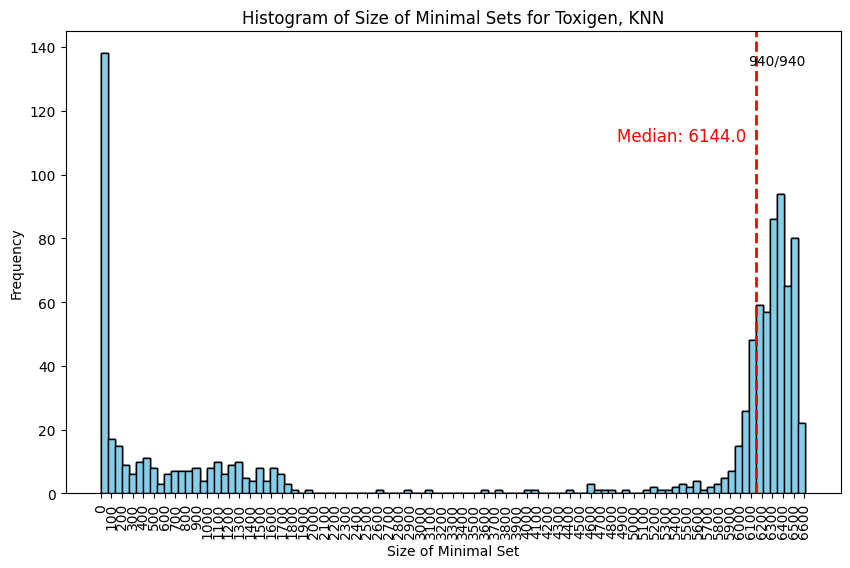

In [63]:
#import pickle

# from utils.constants import RESULTS_DIR

# output_dir = RESULTS_DIR / "MinimalSubset"

# with open (f"{output_dir}/flip_list_alg1_toxigen500.pickle", 'rb') as handle:
#     flip_list = pickle.dump(movement, handle)

num_examples = movement[movement != -1].tolist()

import matplotlib.pyplot as plt
bins = 100
plt.figure(figsize=(10, 6))
plt.hist(num_examples, bins=bins, color='skyblue', edgecolor='black')
tick_locs = np.arange(0, max(num_examples), 100)
plt.xticks(tick_locs, rotation='vertical')
plt.xlabel('Size of Minimal Set')
plt.ylabel('Frequency')
plt.title('Histogram of Size of Minimal Sets for Toxigen, KNN')
plt.text(
    max(num_examples), max(plt.hist(num_examples, bins=bins, color='skyblue', edgecolor='black')[0]), 
    f'{movement.size}/{len(test_labels)}', 
    horizontalalignment='right', verticalalignment='top'
)
# Calculate the median and plot as a line
median_value = np.median(num_examples)
plt.axvline(median_value, color='red', linestyle='--', linewidth=2, label='Median')
# Label the median line with a piece of text
text_height = max(plt.hist(num_examples, bins=bins, color='skyblue', edgecolor='black')[0]) * 0.8
plt.text(median_value - 1300, text_height, f'Median: {median_value}', color='red', fontsize=12)
plt.show()

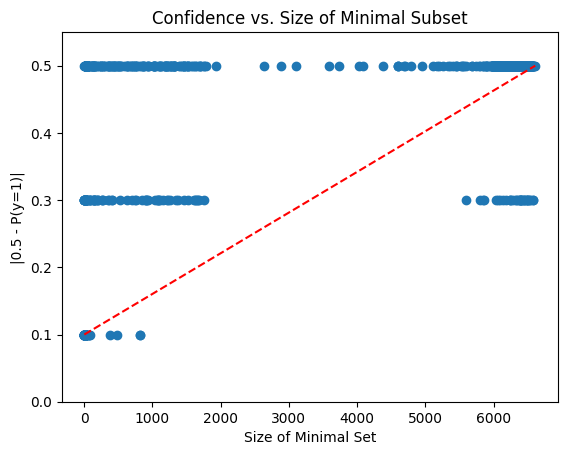

In [72]:
knn_proba = knn_clf.predict_proba(X=test_embeddings)

y = np.abs(0.5 - knn_proba[:, 1])

import matplotlib.pyplot as plt
import numpy as np

# Create scatterplot
plt.scatter(num_examples, y, label='Data')

# Plot diagonal line
plt.plot(
    np.linspace(min(num_examples), max(num_examples), 100), 
    np.linspace(min(y), max(y), 100), color='red', linestyle='--', label='Diagonal'
)

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(0, 0.55)
plt.xlabel('Size of Minimal Set')
plt.ylabel('|0.5 - P(y=1)|')
plt.title('Confidence vs. Size of Minimal Subset')
plt.show()

In [46]:
majority_current = find_majority_batched(neigh_labels[:5, 1187:1187+5])
# Check if majority of the window has changed from the first 5 per row
changed_majority = np.logical_not(majority_current == predictions[:5])
print(predictions)
print(majority_current)
print(neigh_labels[:5, 1187:1187+5])
print(changed_majority)
print(np.logical_and(movement == -1, changed_majority))
# movement[np.logical_and(movement == -1, changed_majority)] = i
# neigh_labels[:5, :20], predictions[:5], 

[0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1
 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 

In [30]:
from MinimalSubsetToFlipPredictions.Yang2023.interface import compute_minimal_subset_to_flip_predictions

from utils.constants import RESULTS_DIR

output_dir = RESULTS_DIR / "MinimalSubset"

compute_minimal_subset_to_flip_predictions(
    dataset_name="toxigen",
    train_embeddings=train_embeddings,
    eval_embeddings=eval_embeddings,
    test_embeddings=test_embeddings,
    train_labels=train_labels,
    eval_labels=eval_labels,
    test_labels=test_labels,
    thresh= 0.5,
    l2= 500,
    output_dir=output_dir,
    algorithm="fast"# algo 1
)

  0%|          | 1/940 [00:00<03:08,  4.99it/s]

0 1364 [0.05069346] 0.8585200426660269


  0%|          | 3/940 [00:00<03:08,  4.96it/s]

1 3383 [0.02060068] 0.8338657203893397
2 2866 [0.01829925] 0.5779431116063307


  1%|          | 5/940 [00:00<02:48,  5.54it/s]

3 2642 [0.02569878] 0.47930681497337063
4 764 [0.93757596] 0.3466167873003211


  1%|          | 6/940 [00:01<02:45,  5.63it/s]

5 3163 [0.01951311] 0.5403979765942413


  1%|          | 7/940 [00:01<02:59,  5.21it/s]

6 371 [0.86661124] 0.42796317158168684


  1%|          | 8/940 [00:01<03:26,  4.52it/s]

7 457 [0.92329576] 0.6298909927090116


  1%|          | 9/940 [00:01<03:51,  4.02it/s]

8 4022 [0.01464793] 0.49560117035729856


  1%|          | 10/940 [00:02<04:21,  3.56it/s]

9 3926 [0.01505446] 0.5069439785327304


  1%|          | 11/940 [00:02<04:20,  3.57it/s]

10 3270 [0.02336755] 0.47680297568979924


  1%|▏         | 12/940 [00:02<04:12,  3.68it/s]

11 78 [0.71600929] 0.4649682462941398


  1%|▏         | 13/940 [00:03<04:06,  3.77it/s]

12 78 [0.65659849] 0.5153566386234938


  1%|▏         | 14/940 [00:03<04:05,  3.78it/s]

13 3181 [0.02114196] 0.5176322949548569


  2%|▏         | 15/940 [00:03<03:56,  3.92it/s]

14 1591 [0.03101162] 0.5006192933576202


  2%|▏         | 16/940 [00:03<03:58,  3.88it/s]

15 344 [0.8405492] 0.4246795045185475


  2%|▏         | 17/940 [00:04<03:42,  4.14it/s]

16 253 [0.13031426] 0.5225866328278662


  2%|▏         | 19/940 [00:04<03:23,  4.53it/s]

17 4516 [0.01433445] 0.530433145097403
18 2210 [0.03729855] 0.5315452548149383


  2%|▏         | 20/940 [00:04<03:02,  5.05it/s]

19 1445 [0.04729052] 0.5205525806560815


  2%|▏         | 22/940 [00:05<03:05,  4.95it/s]

20 4553 [0.01460441] 0.5120837050731398
21 377 [0.83124209] 0.47212303928474575


  3%|▎         | 24/940 [00:05<02:56,  5.20it/s]

22 1909 [0.03849139] 0.5112471972394304
23 158 [0.23732523] 0.5308451298967567


  3%|▎         | 26/940 [00:05<02:46,  5.51it/s]

24 3940 [0.01684535] 0.5214428572115853
25 379 [0.84840271] 0.5005863766247038


  3%|▎         | 28/940 [00:06<02:36,  5.82it/s]

26 443 [0.87507717] 0.4266512689130096
27 69 [0.62898376] 0.44989128448464455


  3%|▎         | 29/940 [00:06<02:52,  5.30it/s]

28 2996 [0.02179496] 0.5085182624873388


  3%|▎         | 30/940 [00:06<02:58,  5.09it/s]

29 4299 [0.01419521] 0.49470350397764457


  3%|▎         | 32/940 [00:06<02:54,  5.20it/s]

30 4417 [0.01529541] 0.4808709625481202
31 629 [0.95199946] 0.42381387789681757


  4%|▎         | 34/940 [00:07<02:55,  5.16it/s]

32 3674 [0.01546357] 0.508744390796066
33 394 [0.86798614] 0.44168748038721806


  4%|▎         | 35/940 [00:07<03:00,  5.01it/s]

34 3310 [0.01971998] 0.5146258000212942


  4%|▍         | 36/940 [00:07<03:07,  4.83it/s]

35 3663 [0.01972771] 0.4867730504714304


  4%|▍         | 38/940 [00:08<02:58,  5.04it/s]

36 2375 [0.0342488] 0.5079927885846042
37 325 [0.9434282] 0.5475286906997864


  4%|▍         | 38/940 [00:08<03:14,  4.63it/s]


KeyboardInterrupt: 

9/940 have no minimal subset to remove
8824/940 are removed at least once


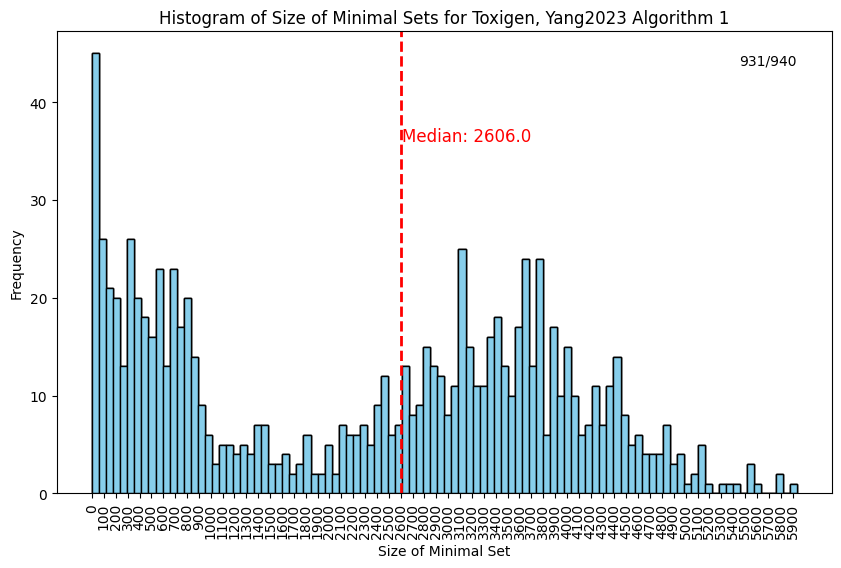

In [55]:
import pickle

from utils.constants import RESULTS_DIR

output_dir = RESULTS_DIR / "MinimalSubset"

with open (f"{output_dir}/flip_list_alg1_toxigen500.pickle", 'rb') as handle:
    flip_list = pickle.load(handle)

no_subsets = 0
all_indices = set()
num_examples = []
# compute some basic statistics
for i, l in enumerate(flip_list):
    if l is None:
        no_subsets += 1
        continue
    # compute the length of indices
    num_examples.append(len(l))
    all_indices.update(l)

print(f"{no_subsets}/{len(test_labels)} have no minimal subset to remove")
print(f"{len(all_indices)}/{len(test_labels)} are removed at least once")

import matplotlib.pyplot as plt

bins = 100
plt.figure(figsize=(10, 6))
plt.hist(num_examples, bins=bins, color='skyblue', edgecolor='black')
tick_locs = np.arange(0, max(num_examples), 100)
plt.xticks(tick_locs, rotation='vertical')
plt.xlabel('Size of Minimal Set')
plt.ylabel('Frequency')
plt.title('Histogram of Size of Minimal Sets for Toxigen, Yang2023 Algorithm 1')
plt.text(
    max(num_examples), max(plt.hist(num_examples, bins=bins, color='skyblue', edgecolor='black')[0]), 
    f'{len(test_labels)- no_subsets}/{len(test_labels)}', 
    horizontalalignment='right', verticalalignment='top'
)
# Calculate the median and plot as a line
median_value = np.median(num_examples)
plt.axvline(median_value, color='red', linestyle='--', linewidth=2, label='Median')
# Label the median line with a piece of text
text_height = max(plt.hist(num_examples, bins=bins, color='skyblue', edgecolor='black')[0]) * 0.8
plt.text(median_value + 3, text_height, f'Median: {median_value}', color='red', fontsize=12)
plt.show()

892/940 have no minimal subset to remove
577/940 are removed at least once


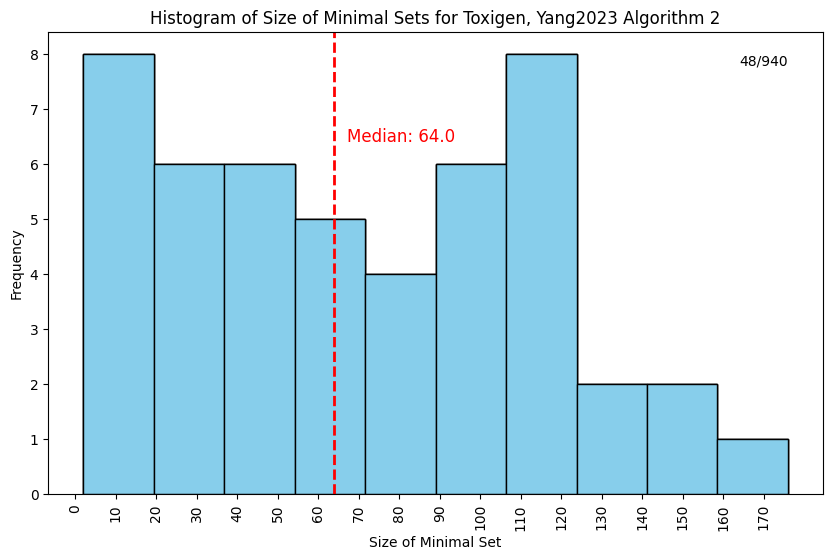

In [54]:
import pickle

from utils.constants import RESULTS_DIR

output_dir = RESULTS_DIR / "MinimalSubset"

with open (f"{output_dir}/order_alg2_toxigen500_LR_I_D1.pickle", 'rb') as handle:
    flip_list = pickle.load(handle)

no_subsets = 0
all_indices = set()
num_examples = []
# compute some basic statistics
for i, l in enumerate(flip_list):
    if l is None or len(l) == 0:
        no_subsets += 1
        continue
    # compute the length of indices
    num_examples.append(len(l))
    all_indices.update(l)

print(f"{no_subsets}/{len(test_labels)} have no minimal subset to remove")
print(f"{len(all_indices)}/{len(test_labels)} are removed at least once")

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bins = 10
plt.hist(num_examples, bins=bins, color='skyblue', edgecolor='black')
tick_locs = np.arange(0, max(num_examples), 10)
plt.xticks(tick_locs, rotation='vertical')
plt.xlabel('Size of Minimal Set')
plt.ylabel('Frequency')
plt.title('Histogram of Size of Minimal Sets for Toxigen, Yang2023 Algorithm 2')
plt.text(
    max(num_examples), max(plt.hist(num_examples, bins=bins, color='skyblue', edgecolor='black')[0]), 
    f'{len(test_labels)- no_subsets}/{len(test_labels)}', 
    horizontalalignment='right', verticalalignment='top'
)
# Calculate the median and plot as a line
median_value = np.median(num_examples)
plt.axvline(median_value, color='red', linestyle='--', linewidth=2, label='Median')
# Label the median line with a piece of text
text_height = max(plt.hist(num_examples, bins=bins, color='skyblue', edgecolor='black')[0]) * 0.8
plt.text(median_value + 3, text_height, f'Median: {median_value}', color='red', fontsize=12)
plt.show()

In [14]:
### Environment variables to be set
from WrapperBox.constants import WORK_DIR
import os

# override in local jupyter
WORK_DIR = os.path.dirname(os.path.abspath(__name__))
CLASSIFIER_PATH = os.path.abspath(os.path.join(WORK_DIR, '..', 'results'))
EMBEDDINGS_PATH = os.path.abspath(os.path.join(WORK_DIR, '..', 'data'))

DATASET = "toxigen"
MODEL = "deberta-large-seed-42"

ModuleNotFoundError: No module named 'WrapperBox'